# Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

## Same csv file used in week 1 boot camp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Feature Scaling
filepath = "datasets/DC_Properties.csv"

props_df = pd.read_csv(filepath)
props_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
# List column names
props_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
# we need to work with PRICE column so determine rows with NaN values
props_df['PRICE'].isna().sum()

60741

In [5]:
# Also check for null values
props_df['PRICE'].isnull().sum()

60741

In [6]:
# Can't just drop the rows with no PRICE data since there are so many
# Use the word location to determine mean price of house there and use it
#rows where the age is missing
missing_price = props_df.loc[props_df['PRICE'].isnull()]
missing_price.head()


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [7]:
# get index numbers of missing rows - we'll use this later
missingIndexes = list(missing_price.index)
#len(missingIndexes)
#str = props_df.iat[missingIndexes]
#str

In [8]:
# Check for missing ward values
print(props_df['WARD'].isna().sum())

1


In [9]:
props_df['WARD'].fillna('Ward 1', inplace=True)

In [10]:
# table of avg price per ward
#out = props_df.groupby(['WARD', 'CNDTN', 'STORIES'])['PRICE'].mean()
#out

#fill missing values for age based on survival status, sex, and passenger class
#df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)
props_df['PRICE'].fillna(props_df.groupby(['WARD'])['PRICE'].transform('mean'), inplace=True)

#modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)


#avgWardPrice = props_df.groupby(['WARD'])['PRICE'].mean()
#print(avgWardPrice['Ward 1'])
#print(avgWardPrice['Ward 2'])

In [137]:
len(props_df)

158957

In [138]:
props_df['PRICE'].max()

137427545.0

In [139]:
props_df['PRICE'].min()

1.0

In [140]:
len(props_df.loc[props_df['PRICE'] <= props_df['PRICE'].min()])

5

In [141]:
# Get rid of the lower and upper outliers
# Interquartile Range (IQR) Method - can be used on both gausian and non-gausian data only
# also called the midspread or middle 50%, or technically H-spread, is a measure of statistical 
# dispersion, being equal to the difference between 75th and 25th percentiles, or between upper 
# and lower quartiles, IQR = Q3 − Q1

q1 = props_df['PRICE'].quantile(.25)
q3 = props_df['PRICE'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

newdf = props_df.copy()
newdf = newdf.drop(newdf[newdf['PRICE'] > toprange].index)
newdf = newdf.drop(newdf[newdf['PRICE'] < botrange].index)

newdf.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [142]:
len(newdf)

143859

In [143]:
newdf['PRICE'].max()

1255000.0

In [144]:
newdf['PRICE'].min()

1.0

In [145]:
len(newdf.loc[newdf['PRICE'] <= newdf['PRICE'].min()])

5

In [146]:
# list to hold column names
colnames = list(newdf.columns)

In [147]:
newdf.count()

Unnamed: 0            143859
BATHRM                143859
HF_BATHRM             143859
HEAT                  143859
AC                    143859
NUM_UNITS              95830
ROOMS                 143859
BEDRM                 143859
AYB                   143613
YR_RMDL                71968
EYB                   143859
STORIES                95792
SALEDATE              120927
PRICE                 143859
QUALIFIED             143859
SALE_NUM              143859
GBA                    95830
BLDG_NUM              143859
STYLE                  95830
STRUCT                 95830
GRADE                  95830
CNDTN                  95830
EXTWALL                95830
ROOF                   95830
INTWALL                95830
KITCHENS               95829
FIREPLACES            143859
USECODE               143859
LANDAREA              143859
GIS_LAST_MOD_DTTM     143859
SOURCE                143859
CMPLX_NUM              48029
LIVING_GBA             48029
FULLADDRESS            95261
CITY          

In [148]:
# Find rows PRICE > 100,000 - this isn't really needed for anything
newdf.loc[newdf['PRICE'] > 100000] 


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
11,11,5,0,Hot Water Rad,Y,3.0,16,6,1905.0,NaN,...,-77.039718,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
12,12,2,0,Hot Water Rad,N,2.0,9,5,1894.0,1979.0,...,-77.039569,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
13,13,2,0,Warm Cool,Y,2.0,11,5,1885.0,1979.0,...,-77.039644,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [149]:
# Find rows where count() < len(newdf)
missingList = []
for col in colnames:
    if newdf[col].count() < len(newdf):
        missingList.append(col)
        
missingList

['NUM_UNITS',
 'AYB',
 'YR_RMDL',
 'STORIES',
 'SALEDATE',
 'GBA',
 'STYLE',
 'STRUCT',
 'GRADE',
 'CNDTN',
 'EXTWALL',
 'ROOF',
 'INTWALL',
 'KITCHENS',
 'CMPLX_NUM',
 'LIVING_GBA',
 'FULLADDRESS',
 'CITY',
 'STATE',
 'ZIPCODE',
 'NATIONALGRID',
 'LATITUDE',
 'LONGITUDE',
 'ASSESSMENT_NBHD',
 'ASSESSMENT_SUBNBHD',
 'CENSUS_TRACT',
 'CENSUS_BLOCK',
 'X',
 'Y',
 'QUADRANT']

In [150]:
# Make new df with missing data columns dropped
smalldf = newdf.drop(missingList, axis=1, inplace=False)
smalldf.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM',
       'EYB', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'WARD', 'SQUARE'],
      dtype='object')

In [151]:
smalldf.count()

Unnamed: 0           143859
BATHRM               143859
HF_BATHRM            143859
HEAT                 143859
AC                   143859
ROOMS                143859
BEDRM                143859
EYB                  143859
PRICE                143859
QUALIFIED            143859
SALE_NUM             143859
BLDG_NUM             143859
FIREPLACES           143859
USECODE              143859
LANDAREA             143859
GIS_LAST_MOD_DTTM    143859
SOURCE               143859
WARD                 143859
SQUARE               143859
dtype: int64

In [152]:
smalldf['PRICE'].max()

1255000.0

In [153]:
smalldf['PRICE'].min()

1.0

In [154]:
len(smalldf.loc[smalldf['PRICE'] <= smalldf['PRICE'].min()])

5

In [155]:
#smalldf = smalldf.drop(smalldf.loc[smalldf['PRICE'] <= smalldf['PRICE'].min()], axis=0, inplace=True)
smalldf = smalldf.drop(smalldf[smalldf['PRICE'] <= smalldf['PRICE'].min()].index)

In [156]:
smalldf = smalldf.drop(['Unnamed: 0'], axis=1)

In [157]:
smalldf.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'EYB', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'WARD', 'SQUARE'],
      dtype='object')

In [158]:
holddf = smalldf.copy() 
smalldf.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,PRICE,QUALIFIED,SALE_NUM,BLDG_NUM,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,WARD,SQUARE
0,4,0,Warm Cool,Y,8,4,1972,1.095000e+06,Q,1,1,5,24,1680,2018-07-22 18:01:43,Residential,Ward 2,152
1,3,1,Warm Cool,Y,11,5,1972,1.098570e+06,U,1,1,4,24,1680,2018-07-22 18:01:43,Residential,Ward 2,152
4,2,1,Warm Cool,Y,11,3,1985,1.098570e+06,U,1,1,0,13,2032,2018-07-22 18:01:43,Residential,Ward 2,152
6,1,0,Warm Cool,Y,5,2,1957,1.098570e+06,U,1,1,0,24,1261,2018-07-22 18:01:43,Residential,Ward 2,152
7,3,1,Hot Water Rad,Y,8,4,1972,1.050000e+06,Q,1,1,1,24,1627,2018-07-22 18:01:43,Residential,Ward 2,152


In [159]:
len(smalldf)

143854

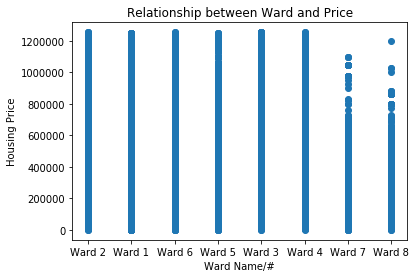

In [160]:
# compare home price in Wards
plt.scatter(smalldf['WARD'], smalldf['PRICE']) 
plt.xlabel("Ward Name/#") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Ward and Price") 
plt.show()

In [161]:
# Descriptive statistics
smalldf.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,PRICE,SALE_NUM,BLDG_NUM,FIREPLACES,USECODE,LANDAREA
count,143854.000000,143854.000000,143854.000000,143854.000000,143854.000000,1.438540e+05,143854.000000,143854.000000,143854.000000,143854.000000,143854.00000
mean,1.726487,0.430694,6.037114,2.660281,1962.850911,4.593569e+05,1.677764,1.000507,0.458103,14.284782,2196.23113
std,0.879947,0.569772,2.486024,1.296751,25.110892,2.631652e+05,1.291465,0.030630,12.100091,3.763567,3352.30618
min,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000e+01,1.000000,1.000000,0.000000,11.000000,0.00000
25%,1.000000,0.000000,4.000000,2.000000,1954.000000,2.619000e+05,1.000000,1.000000,0.000000,11.000000,650.00000
50%,2.000000,0.000000,6.000000,3.000000,1962.000000,4.080000e+05,1.000000,1.000000,0.000000,13.000000,1600.00000
75%,2.000000,1.000000,7.000000,3.000000,1972.000000,5.738363e+05,2.000000,1.000000,1.000000,17.000000,2774.00000
max,14.000000,11.000000,48.000000,24.000000,2018.000000,1.255000e+06,15.000000,5.000000,4068.000000,117.000000,691817.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8A67DBC50>,
      dtype=object)

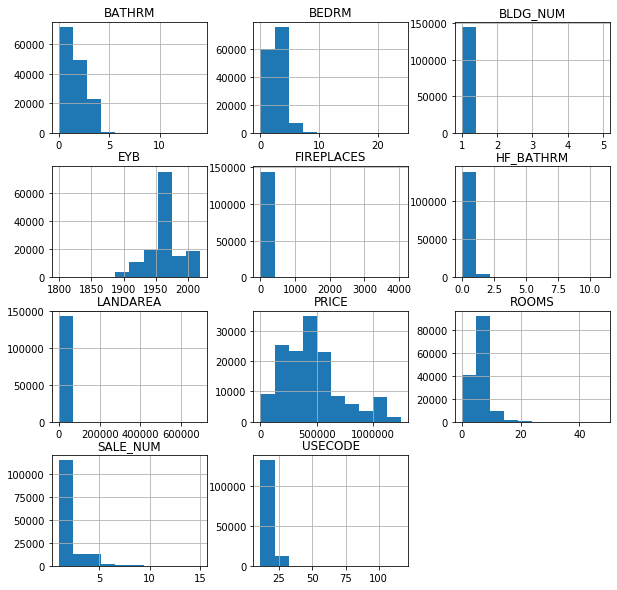

In [162]:
# Plot the frequency count for each column
smalldf.hist(figsize=(10,10))

In [163]:
# Method 1: manual calculation of z-scores for 'PRICE' column

# mean for the column
mean = smalldf['PRICE'].mean()

# standard deviation of the column
std = smalldf['PRICE'].std()

# each value in column minus the mean and then divide by the standard deviation
price_z_manual = (smalldf['PRICE'] - mean)/std

In [164]:
smalldf['PRICE'].max()

1255000.0

In [165]:
smalldf['PRICE'].min()

10.0

In [166]:
# Values for mean and standard deviation of 'PRICE column'
#format(mean, '.2f'), format(std, '.2f')
mean, std

(459356.9014173606, 263165.2417959367)

In [167]:
price_z_manual.head()

0    2.415376
1    2.428944
4    2.428944
6    2.428944
7    2.244381
Name: PRICE, dtype: float64

In [168]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(smalldf[['PRICE']])

In [169]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(3.477290071705413e-17, 1.0)

In [170]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
p_z_col = pd.Series(price_zscore.reshape(-1))

In [171]:
p_z_col.head()

0    2.415385
1    2.428952
2    2.428952
3    2.428952
4    2.244389
dtype: float64

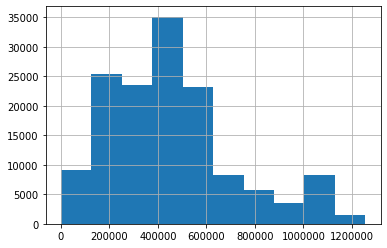

In [172]:
#BEFORE: frequency count plot of 'PRICE' column
smalldf['PRICE'].hist()

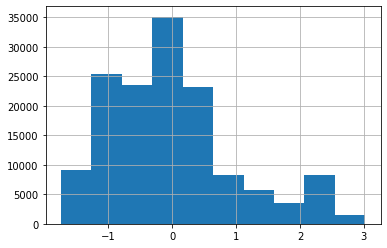

In [173]:
#AFTER: frequency count plot of 'PRICE' column (z-score standardization)
#range is much smaller
p_z_col.hist()

In [174]:
stat = smalldf.describe()
stat

,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,PRICE,SALE_NUM,BLDG_NUM,FIREPLACES,USECODE,LANDAREA
count,143854.000000,143854.000000,143854.000000,143854.000000,143854.000000,1.438540e+05,143854.000000,143854.000000,143854.000000,143854.000000,143854.00000
mean,1.726487,0.430694,6.037114,2.660281,1962.850911,4.593569e+05,1.677764,1.000507,0.458103,14.284782,2196.23113
std,0.879947,0.569772,2.486024,1.296751,25.110892,2.631652e+05,1.291465,0.030630,12.100091,3.763567,3352.30618
min,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000e+01,1.000000,1.000000,0.000000,11.000000,0.00000
25%,1.000000,0.000000,4.000000,2.000000,1954.000000,2.619000e+05,1.000000,1.000000,0.000000,11.000000,650.00000
50%,2.000000,0.000000,6.000000,3.000000,1962.000000,4.080000e+05,1.000000,1.000000,0.000000,13.000000,1600.00000
75%,2.000000,1.000000,7.000000,3.000000,1972.000000,5.738363e+05,2.000000,1.000000,1.000000,17.000000,2774.00000
max,14.000000,11.000000,48.000000,24.000000,2018.000000,1.255000e+06,15.000000,5.000000,4068.000000,117.000000,691817.00000


In [175]:
stat.dtypes

BATHRM        float64
HF_BATHRM     float64
ROOMS         float64
BEDRM         float64
EYB           float64
PRICE         float64
SALE_NUM      float64
BLDG_NUM      float64
FIREPLACES    float64
USECODE       float64
LANDAREA      float64
dtype: object

In [176]:
holddf.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'EYB', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'WARD', 'SQUARE'],
      dtype='object')

In [134]:
#show z-score standardization for all columns - this can only be done on int, float, etc. NO STRING fields
# Remove 'HEAT', 'AC', 'QUALIFIED', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'WARD', 'SQUARE' columns
numonlydf = holddf.copy()
strColNames = list(['HEAT', 'AC', 'QUALIFIED', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'WARD', 'SQUARE'])
numonlydf = holddf.drop(strColNames, axis=1, inplace=False)
#smalldf = smalldf.drop(['Unnamed: 0'], axis=1)
#all_zscore = scaler.fit_transform(smalldf)

#list to hold column names
#revcolnames = list(smalldf.columns)
#revcolnames

AttributeError: 'NoneType' object has no attribute 'drop'

In [120]:
#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(smalldf['PRICE']), columns = colnames)



ValueError: Expected 2D array, got 1D array instead:
array=[1095000.         1098570.42947274 1098570.42947274 ...  600000.
  215100.          526868.43706573].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

In [ ]:
# Check for missing price values again
print(props_df['PRICE'].isnull().sum())
print(props_df['PRICE'].isna().sum())
print(props_df['PRICE'].notna().sum())
print(props_df['WARD'].isna().sum())
test = props_df['PRICE'].isna()
#type(test)
#len(test)

In [ ]:
props_df.count()

In [ ]:
props_df.drop(['HEAT','GRADE','STRUCT','EXTWALL','ROOF', 'INTWALL','NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','X','Y','QUADRANT'], axis=1, inplace=True)

In [ ]:
props_df.count()

In [ ]:
# compare home price in Wards
plt.scatter(props_df['WARD'], (props_df['PRICE']/100)) 
plt.xlabel("Ward Name/#") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Ward and Price") 
plt.show()

In [ ]:
# Descriptive statistics
props_df.describe()

In [ ]:
#plot the frequency count for each column
props_df.hist(figsize=(10,10))

In [ ]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = props_df['PRICE'].mean()

#standard deviation of the column
std = props_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (props_df['PRICE'] - mean)/std

In [ ]:
#values for mean and standard deviation of 'PRICE column'
format(mean, '.2f'), format(std, '.2f')
#mean, std

In [ ]:
price_z_manual.head()

In [ ]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(props_df[['PRICE']])

In [ ]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

In [ ]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
p_z_col = pd.Series(price_zscore.reshape(-1))

In [ ]:
p_z_col.head()

In [ ]:
#BEFORE: frequency count plot of 'PRICE' column
props_df['PRICE'].hist()

In [ ]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
p_z_col.hist()

In [ ]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(props_df.columns)
colnames

In [ ]:
#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(props_df), columns = colnames)

#plot frequency distribution with same scale range
#zscore_df.hist(figsize=(10,10), sharex=True)